### 학습목표

- KNN 모델을 활용하여 분류 실습을 진행한다.
- KNN 모델의 Hyperparameter를 조정하여 최적의 모델을 찾는다.
- 붓꽃데이터를 활용하여 머신러닝 모델 학습, 예측, 평가를 진행한다

In [1]:
# 0. 필요한 라이브러리 불러오기

import numpy as np
import pandas as pd

# 1. 머신러닝 도구 불러오기
# KNN 분류 알고리즘 불러오기
from sklearn.neighbors import KNeighborsClassifier 


### 개념 정리
1. 일반화 : 훈련 데이터를 적절히 학습하여서 모델의 성능이 최고로 올라왔을 때의 지점
2. 과대적합 : 훈련 데이터에 모델이 너무 맞춰져 있어서 성능이 저하되는 현상
3. 과소적합 : 훈련 데이터를 제대로 학습하지 못해서 성능이 저하되는 현상
4. KNN : 비선형 모델, 거리를 기반으로 가장 가까운 데이터 포인트로 최종 예측 

In [2]:
# 1. KNN모델 객체 생성
# 장점 : 정해져 있는 수학 공식이 있기 때문에, 학습 속도, 예측 속도가 빠르다.
#       일반적으로 특별한 조정 없이 좋은 성능을 발휘한다.

# 단점 :  거리를 기반으로 예측을 진행하다보니, 데이터의 범위에 대해 민감하다.
#       위와 같은 이유로 데이터의 범위를 맞춰주는 scale작업이 필요하다.

knn =  KNeighborsClassifier()

In [3]:
# 2. 데이터 불러오기
# 사이킷-런에서 제공하는 학습용 데이터를 불러오기

from sklearn.datasets import load_iris

data = load_iris(as_frame = True)

In [4]:
# dictionary와 유사한 bunch객체에 감싸져서 제공되고 있음
# keys : 딕셔너리에서 key값만 확인하고 싶을 때 사용하는 함수

# data : 문제 데이터(꽃받침 너비, 길이, 꽃잎 너비, 길이)
# target : 정답 데이터(setosa, viginica, virgicolor)
# target_names :  정답 데이터의 실제 이름
# DESCR : 해당 데이터릐 설명(해당 데이터의 출저, 데이터를 모델링한 사람의 이름)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# 3. 데이터 확인
# 문제 데이터 -> 특성 데이터 -> X

X = data['data']
# 정답 데이터는 한 열만 담당하기 때문에 DataFrame이 아닌, Series로 반환된다.

y = data['target']

# 정답 데이터의 실제 이름 확인
# 0 : setosa, 1 : versicolor, 2 : virginica
target_names = data['target_names']

# 문제 데이터의 이름
# 1. sepal Length : 꽃받침의 길이
# 2. sepal width : 꽃받침의 너비
# 3. petal Length : 꽃잎의 길이
# 4. petal width : 꽃잎의 너비

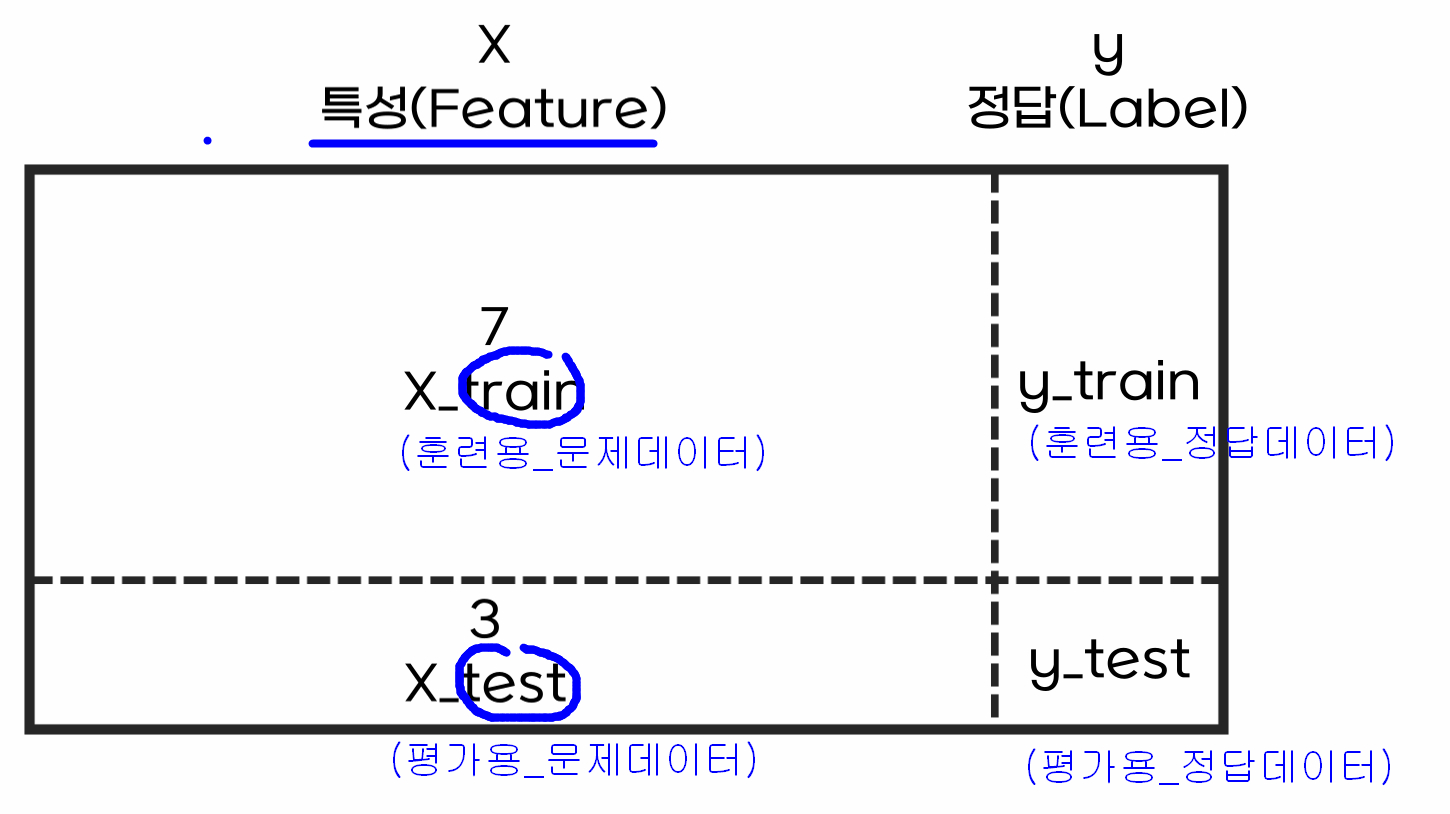

In [6]:
# 학습하기 전에 확인할 사항
# 1. 특성 데이터가 학습 해도 되는 타입인지(숫자인지 확인)

# 결측치의 개수를 확인하는 방법

# 결측치 확인하는 함수 -> isnull(), isna()
# False : 0, True : 1

X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
# 4. 모델 학습
# 모델을 학습 뒤에는 잘 학습 했는지 평가해야하는데, 시험지가 없어
# 학습할 데이터에서 30%정도 미리 빼둬야 한다.
# train, test 데이터 셋 분리
# 7:3 비율로 분리 -> 105 : 45


# 모든 컬럼을 104번째 행까지 자르기
X_train = X.iloc[0:105, : ]
y_train = y[0:105]

# 평가용 데이터 분리

X_test = X.iloc[105 : , : ]
y_test = y[105 : ]

#  머신러닝 시험!

In [8]:
import random

# 리스트로 된 시리즈 y
# y = list(range(1, 151))

# 섞기
# random.shuffle(y)

print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


In [9]:
# 위에서 순서대로 나누면, 데이터 편향성 문제가 발생한다.
# -> 해결법 : 데이터를 랜덤하게 섞어서 나눠야한다.
# 사이킷-런에서 위의 기능을 따로 제공
# -> train_test_split

from sklearn.model_selection import train_test_split
# train_test_split(X, y, test_size = 0.3, random_state = 42) 30%
# 주의할 점 : 변수 4개에 동시에 넣으라고 만든 함수라서 변수의 입력 순서를 유의해야한다.
# 주의할 점 : 난수를 설정하지 않으면 파일을 실행할 때마다 모델의 성능이 달라지게 된다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
12,4.8,3.0,1.4,0.1
52,6.9,3.1,4.9,1.5
27,5.2,3.5,1.5,0.2
34,4.9,3.1,1.5,0.2
54,6.5,2.8,4.6,1.5
...,...,...,...,...
148,6.2,3.4,5.4,2.3
79,5.7,2.6,3.5,1.0
109,7.2,3.6,6.1,2.5
106,4.9,2.5,4.5,1.7


In [10]:
# train_test_split으로 나눴다면, 각자 데이터의 모양을 확인해야한다.
# shape

# X_train, X_test, y_train, y_test의 모양을 출력하시오.
# X(특성)끼리 행의 개수가 일치하는지
# train끼리, test끼리 행의 개수가 일치하는지

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(105, 4)
(45, 4)
(105,)
(45,)


In [11]:
# 데이터 편향성 : 특정 데이터에 몰려 있으면 모델은 해당 데이터로 전부다 분류하는 경향을 가지기 때문에
#                데이터가 골고루 분포행 있는지 확인하는 작업이 필요

np.bincount(y_train)

array([35, 35, 35], dtype=int64)

In [12]:
# 모델 불러오기
# n_neighbors 값은 홀수로 넣어야한다. (8을 넣었는데 똑같이 4:4비율로 나뉘게 되면 판단이 불가능하기 때문)

knn = KNeighborsClassifier(n_neighbors = 7)

In [13]:
# 모델 학습
# X,y ->  X_train, y_train

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [14]:
# 모델 예측
# -> test 데이터를 활용해서 예측을 진행
# predict
# 학습을 한 모델한테 시험 문제를 제공해서 결과를 반환받는다.
pre = knn.predict(X_test)

# 분류한 꽃의 품종 인덱싱을 통해 출력
pre

array([0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1,
       0])

In [15]:
# 모델 평가
# -> 점수(얼마나 잘 맞췄는지 백분율로 반환)
# score
# 성능이 좋다 : 90 ~ 100 -> 실제 서비스화 해도 무방하다.
# 성능이 썩 나쁘지 않다 : 80 ~ 90 -> 개선의 여지는 있지만 사용해도 무방한 정도
# 개선을 해야한다 : 40 ~ 80
# 다른 모델을 알아보거나 데이터 전처리를 다시 해야한다 : 40미만

result = knn.score(X_test,y_test)
print(f'{int(result * 100)}%')

95%


In [16]:
# 새로운 모델 생성
# 기존에 Hyperparameter는 7
# 새로운 모델은 11을 넣고 모델 학습, 모델 평가


In [17]:
# 모델 객체 생성
# 하이퍼 파라미터가 작을수록 과대적합 확률 발생
# 하이퍼 파라미터가 클수록 과소적합 확률 발생

knn2 = KNeighborsClassifier(n_neighbors=11)

# 모델 학습
knn2.fit(X_train, y_train)

# 모델 평가
pre2 = knn2.predict(X_test)

result2 = knn2.score(X_test,y_test)

print(f'{result2:.2f}')

0.96


In [18]:
# 성능을 최대화 할 수 있는 n_neighbors 값을 찾아보자!
test_score = []
train_score = []

for i in range(1,101):
    knn2 = KNeighborsClassifier(n_neighbors = i)

    # 모델 학습
    knn2.fit(X_train, y_train)

    # 모델 평가(테스트 데이터)
    score = knn2.score(X_test,y_test)
    #
    test_score.append(score)

    # 모델 평가(훈련 데이터)
    # 모델을 훈련시킨 데이터로 평가를 진행하기 때문에 점수가 높을 수 밖에 없다.

    score2 = knn2.score(X_train, y_train)
    # train_score에 평가점수 추가
    train_score.append(score2)
    

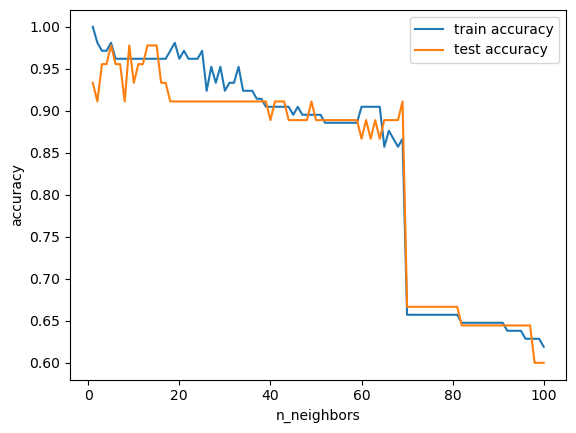

In [19]:
# train, test 데이터로 평가 점수를 시각화
from matplotlib import pyplot as plt

# 선 그래프 그리기

plt.plot(range(1,101),train_score, label = 'train accuracy')
plt.plot(range(1,101),test_score, label = 'test accuracy')

# 범례 표시

plt.legend()

# X, y측의 이름 설정

plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

# 그래프 출력
plt.show()